In [12]:
from __future__ import print_function
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.tsa.api as smtsa
import statsmodels.api as sm

import os

%matplotlib inline

In [13]:
ibm_df=pd.read_csv('DataFiles/ibm-common-stock-closing-prices.csv')

In [14]:
ibm_df.head()

,Date,IBM common stock closing prices
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


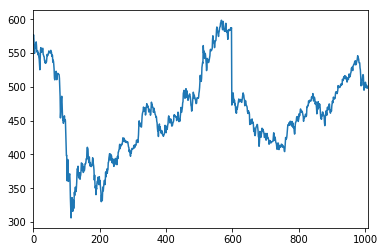

In [15]:
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'},inplace=True)
ibm_df.head()
ibm_df.Close_Price.plot()

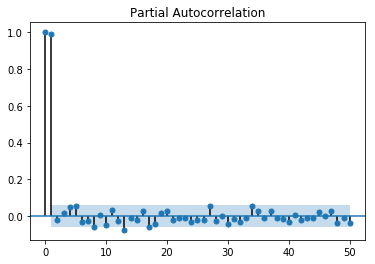

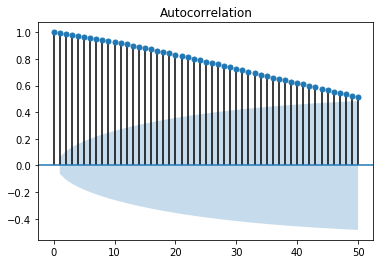

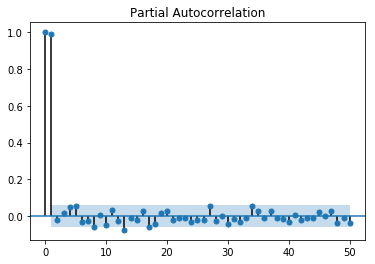

In [17]:
ibm_df=ibm_df.dropna()
plot_acf(ibm_df.Close_Price,lags=50)
plot_pacf(ibm_df.Close_Price,lags=50)


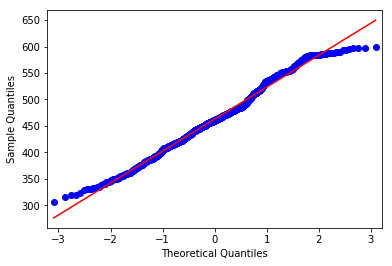

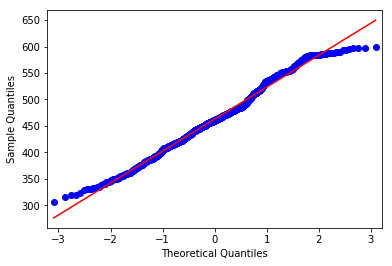

In [19]:
sm.qqplot(ibm_df['Close_Price'],line='s')

In [20]:
aicVal=[]
for ari in range(1,3):
    for maj in range(0,3):
        arma_obj=smtsa.ARMA(ibm_df.Close_Price.tolist(),order=(ari,maj)).fit(maxlag=30,method='mle',trend='nc')
        aicVal.append([ari,maj,arma_obj.aic])

arma_obj_fin=smtsa.ARMA(ibm_df.Close_Price.tolist(),order=(1,0)).fit(maxlag=30,method='mle',trend='nc')
ibm_df['ARMA']=arma_obj_fin.predict()
arma_obj_fin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1008
Model:                     ARMA(1, 0)   Log Likelihood               -3349.383
Method:                           mle   S.D. of innovations              6.683
Date:                Sat, 03 Mar 2018   AIC                           6702.767
Time:                        12:40:59   BIC                           6712.598
Sample:                             0   HQIC                          6706.502
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9999      0.000   9222.316      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

ValueError: You passed in an invalid linestyle, `---`.  See docs of Line2D.set_linestyle for valid values.

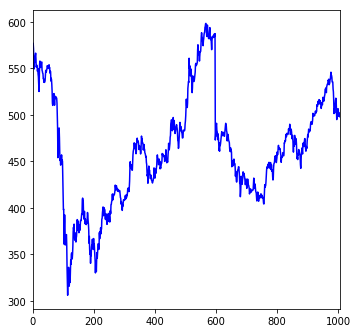

In [21]:
f,axarr=plt.subplots(1,sharex=True)
f.set_size_inches(5.5,5.5)
ibm_df['Close_Price'].iloc[1:].plot(color='b',linestyle='-',ax=axarr)
ibm_df['ARMA'].iloc[1:].plot(color='r',linestyle='--',ax=axarr)
axarr.set_title('ARMA(1,0)')

plt.xlabel('Index')
plt.ylabel('Closing price')